In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sampleSubmission = pd.read_csv('./data/sampleSubmission.csv')

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [7]:
train['Dates'] = train['Dates'].astype('datetime64[ns]')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [8]:
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.day_of_week
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute

In [9]:
train['X+Y'] = train['X'] + train['Y']
train['X-Y'] = train['X'] - train['Y']

In [10]:
train['Dates']

0        2015-05-13 23:53:00
1        2015-05-13 23:53:00
2        2015-05-13 23:33:00
3        2015-05-13 23:30:00
4        2015-05-13 23:30:00
                 ...        
878044   2003-01-06 00:15:00
878045   2003-01-06 00:01:00
878046   2003-01-06 00:01:00
878047   2003-01-06 00:01:00
878048   2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: datetime64[ns]

In [11]:
# dataset에서 최초의 사건 발생 이후로, 각 사건들이 발생하는데 걸린 날짜
train['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x: x.days)
#test['n_days'] = (test['Dates'].dt.date - test['Dates'].dt.date.min()).apply(lambda x: x.days)
# days attribute은 Series가 아닌 train['Dates'] 내 각 원소의 속성이므로, 원소 각각에 함수를 적용해야함

In [12]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [13]:
# 연도별 범죄 발생횟수
pd.value_counts(train['year']).sort_index()
train.value_counts('year').sort_index()
train.groupby('year').size()
# 위 세 방법은 모두 같은 리턴값

C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\3098993415.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['year']).sort_index()


year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
dtype: int64

In [14]:
# 월별 범죄 횟수
pd.value_counts(train['month']).sort_index()
train.value_counts('month').sort_index()

C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\1964543286.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['month']).sort_index()


month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: count, dtype: int64

In [15]:
# 요일별 범죄 횟수
pd.value_counts(train['dayofweek']).sort_index()
train.value_counts('dayofweek').sort_index()

C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\3383602470.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['dayofweek']).sort_index()


dayofweek
0    121584
1    124965
2    129211
3    125038
4    133734
5    126810
6    116707
Name: count, dtype: int64

In [16]:
# 카테고리별 범죄 횟수
pd.value_counts(train['Category']).sort_index()
train.value_counts('Category').sort_index()

C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\1569676437.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['Category']).sort_index()


Category
ARSON                            1513
ASSAULT                         76876
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36755
DISORDERLY CONDUCT               4320
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53971
DRUNKENNESS                      4280
EMBEZZLEMENT                     1166
EXTORTION                         256
FAMILY OFFENSES                   491
FORGERY/COUNTERFEITING          10609
FRAUD                           16679
GAMBLING                          146
KIDNAPPING                       2341
LARCENY/THEFT                  174900
LIQUOR LAWS                      1903
LOITERING                        1225
MISSING PERSON                  25989
NON-CRIMINAL                    92304
OTHER OFFENSES                 126182
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7484
RECOVERED VEHICLE                3138
ROBBERY                         23000
RUN

In [17]:
train.isnull().any().sum()

0

In [18]:
# 모델 생성시 불필요한 칼럼 삭제
# Dates, Category, Descript, DayofWeek, Resolution
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'X+Y', 'X-Y', 'n_days'],
      dtype='object')

In [19]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [20]:
train = train.drop(['Dates','Descript','DayOfWeek','Resolution'], axis=1)

In [21]:
train.head()

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


<Axes: xlabel='month'>

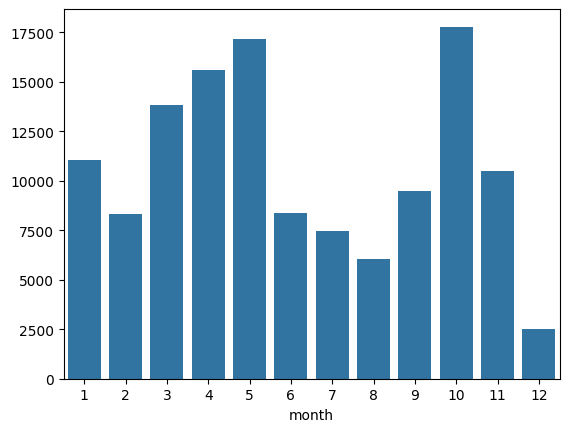

In [22]:
sns.barplot(x=train.groupby('month').size().index, y=train.groupby('month').size().values -62500)

<Axes: xlabel='year'>

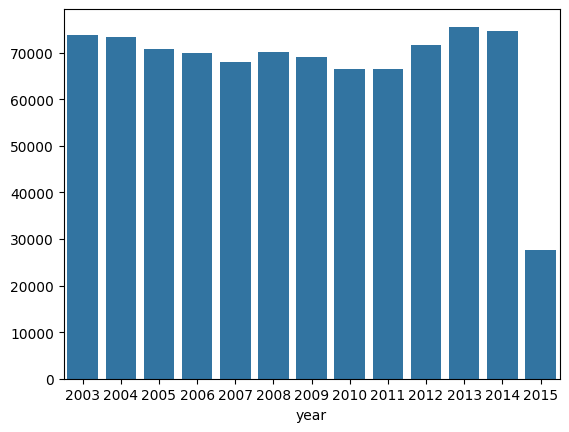

In [23]:
sns.barplot(x=train.groupby('year').size().index, y = train.groupby('year').size().values)

<Axes: xlabel='day'>

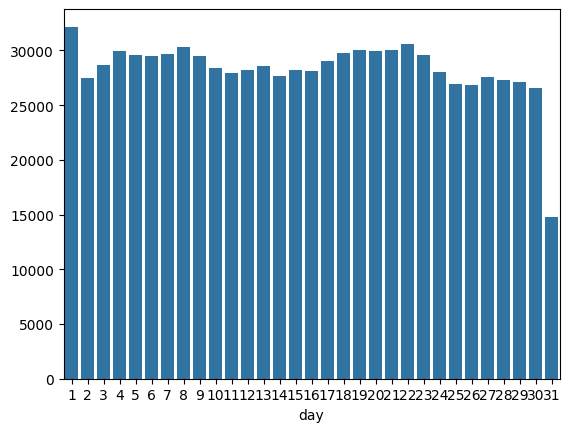

In [24]:
sns.barplot(x=train.groupby('day').size().index, y = train.groupby('day').size().values)

In [25]:
train

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,0,15,-84.744977,-160.173089,0
878045,LARCENY/THEFT,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,0,1,-84.715416,-160.179311,0
878046,LARCENY/THEFT,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,0,1,-84.623125,-160.183656,0
878047,VANDALISM,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,0,1,-84.609924,-160.171138,0


<Axes: xlabel='hour'>

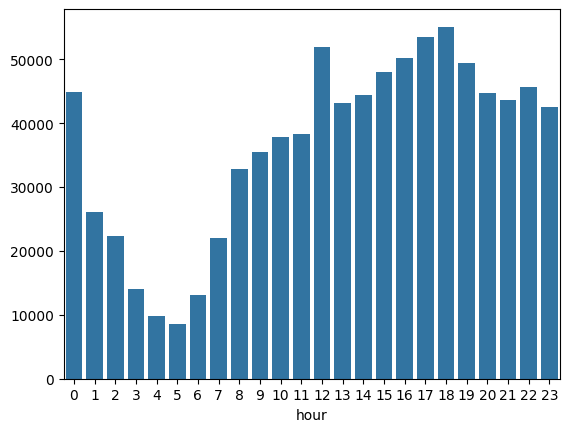

In [26]:
sns.barplot(x=train.groupby('hour').size().index, y = train.groupby('hour').size().values)

### 위경도 시각화

In [27]:
train[['X','Y']]

,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541
...,...,...
878044,-122.459033,37.714056
878045,-122.447364,37.731948
878046,-122.403390,37.780266
878047,-122.390531,37.780607


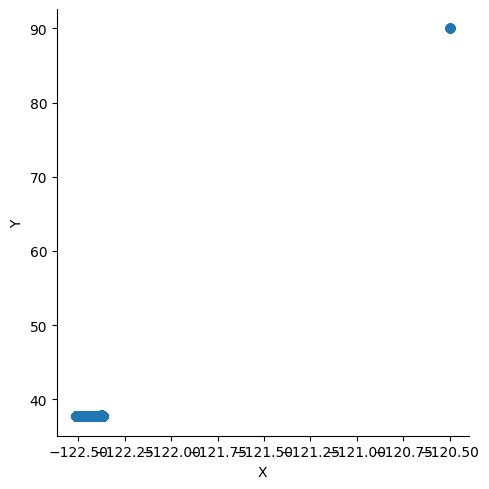

In [28]:
sns.lmplot(data=train, x='X',y='Y',fit_reg=False)
# 샌프란시스코 발생한 범죄 중 이상치로 판단되는 위경도 좌표 제거

In [29]:
train['X'].max(),train['Y'].max()

(-120.5, 90.0)

In [30]:
X_outliers = train['X'] == train['X'].max()
Y_outliers = train['Y'] == train['Y'].max()

outliers = train[X_outliers & Y_outliers]
outliers

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
660485,LARCENY/THEFT,TENDERLOIN,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,4,17,0,-30.5,-210.5,1089
660711,ASSAULT,BAYVIEW,JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,4,0,34,-30.5,-210.5,1089
660712,ASSAULT,BAYVIEW,JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,4,0,34,-30.5,-210.5,1089
661106,NON-CRIMINAL,TENDERLOIN,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,3,0,7,-30.5,-210.5,1088
666430,OTHER OFFENSES,TENDERLOIN,5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,2,11,25,-30.5,-210.5,1059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844995,OTHER OFFENSES,INGLESIDE,JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,11,2,8,49,-30.5,-210.5,156
845842,OTHER OFFENSES,INGLESIDE,JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,9,0,9,25,-30.5,-210.5,154
852880,SEX OFFENSES FORCIBLE,SOUTHERN,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,2003,5,2,4,1,0,-30.5,-210.5,116
857248,ROBBERY,BAYVIEW,GILMAN AV / FITCH ST,-120.5,90.0,2003,4,14,0,16,30,-30.5,-210.5,98


In [31]:
non_outliers = train[~(X_outliers & Y_outliers)]

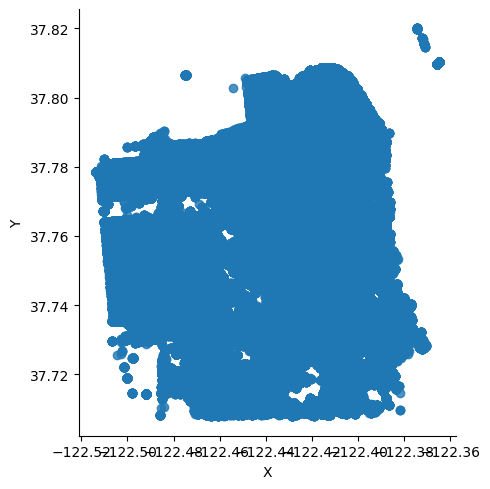

In [32]:
sns.lmplot(data=non_outliers, x='X',y='Y',fit_reg=False)
# SF 지도의 모습과 동일

<Axes: xlabel='X', ylabel='Y'>

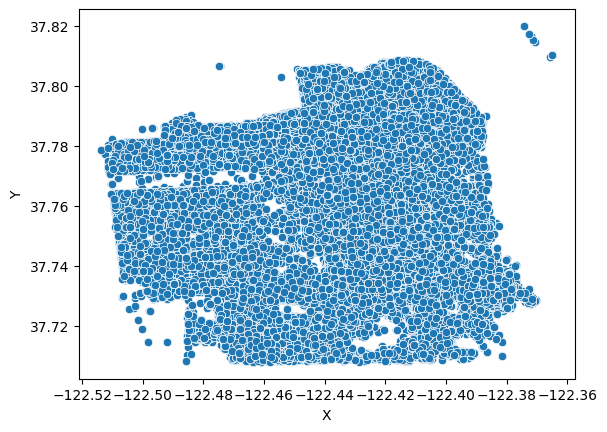

In [33]:
sns.scatterplot(data=non_outliers,x='X',y='Y')

In [34]:
non_outliers['Category'].value_counts().index[:20]

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY', 'SEX OFFENSES FORCIBLE'],
      dtype='object', name='Category')

<Axes: xlabel='count', ylabel='Category'>

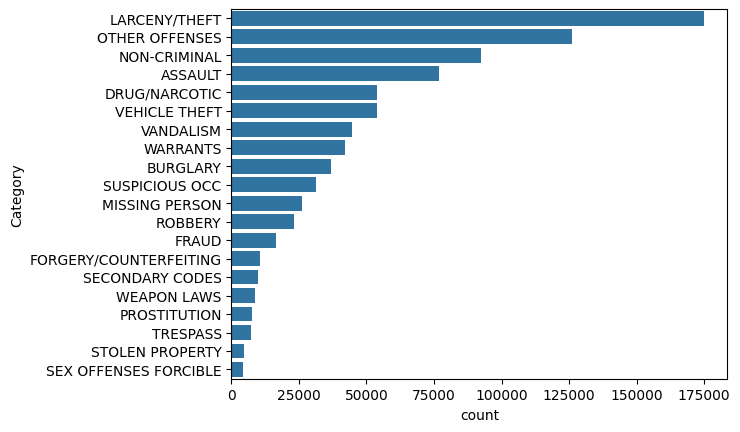

In [35]:
# 발생 빈도 상위 20개의 범죄 유형
sns.countplot(data=non_outliers, y = 'Category', order=non_outliers['Category'].value_counts().index[:20])

In [36]:
# 범죄유형에 따른 요일별 발생빈도 
crime = non_outliers.groupby(['Category','dayofweek'])['dayofweek'].count()

In [37]:
time = '2005-12-30'
dt_time = pd.to_datetime(time)

In [39]:
eng_dow = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
crime = crime.unstack(fill_value=0)

In [40]:
crime.columns = eng_dow
crime

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Category,,,,,,,
ARSON,228,235,200,199,220,220,211
ASSAULT,10559,10280,10553,10246,11157,11995,12082
BAD CHECKS,66,76,71,66,62,45,20
BRIBERY,41,37,40,39,49,42,41
BURGLARY,5262,5374,5457,5350,6326,4754,4231
DISORDERLY CONDUCT,608,657,659,643,541,624,586
DRIVING UNDER THE INFLUENCE,263,251,221,282,352,457,442
DRUG/NARCOTIC,7823,8474,9267,8454,7420,6390,6143
DRUNKENNESS,513,461,542,496,622,833,813


In [41]:
crime.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Category,,,,,,,
ARSON,228,235,200,199,220,220,211
ASSAULT,10559,10280,10553,10246,11157,11995,12082
BAD CHECKS,66,76,71,66,62,45,20
BRIBERY,41,37,40,39,49,42,41
BURGLARY,5262,5374,5457,5350,6326,4754,4231


<Axes: ylabel='Category'>

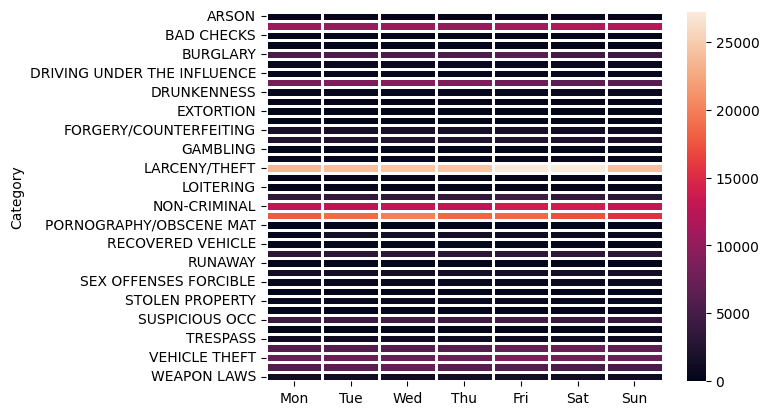

In [42]:
sns.heatmap(data = crime, linewidths=2)

In [48]:
len(non_outliers['Category'].unique())

39

In [51]:
non_outliers.head()

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\2793512632.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pic.set_xticklabels(eng_dow)
C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\2793512632.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pic.set_xticklabels(eng_dow)
C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\2793512632.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pic.set_xticklabels(eng_dow)
C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\2793512632.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pic.set_xticklabels(eng_dow)
C:\Users\wooju\AppData\Local\Temp\ipykernel_40136\2793512632.py:14: UserWarning: set_ticklab

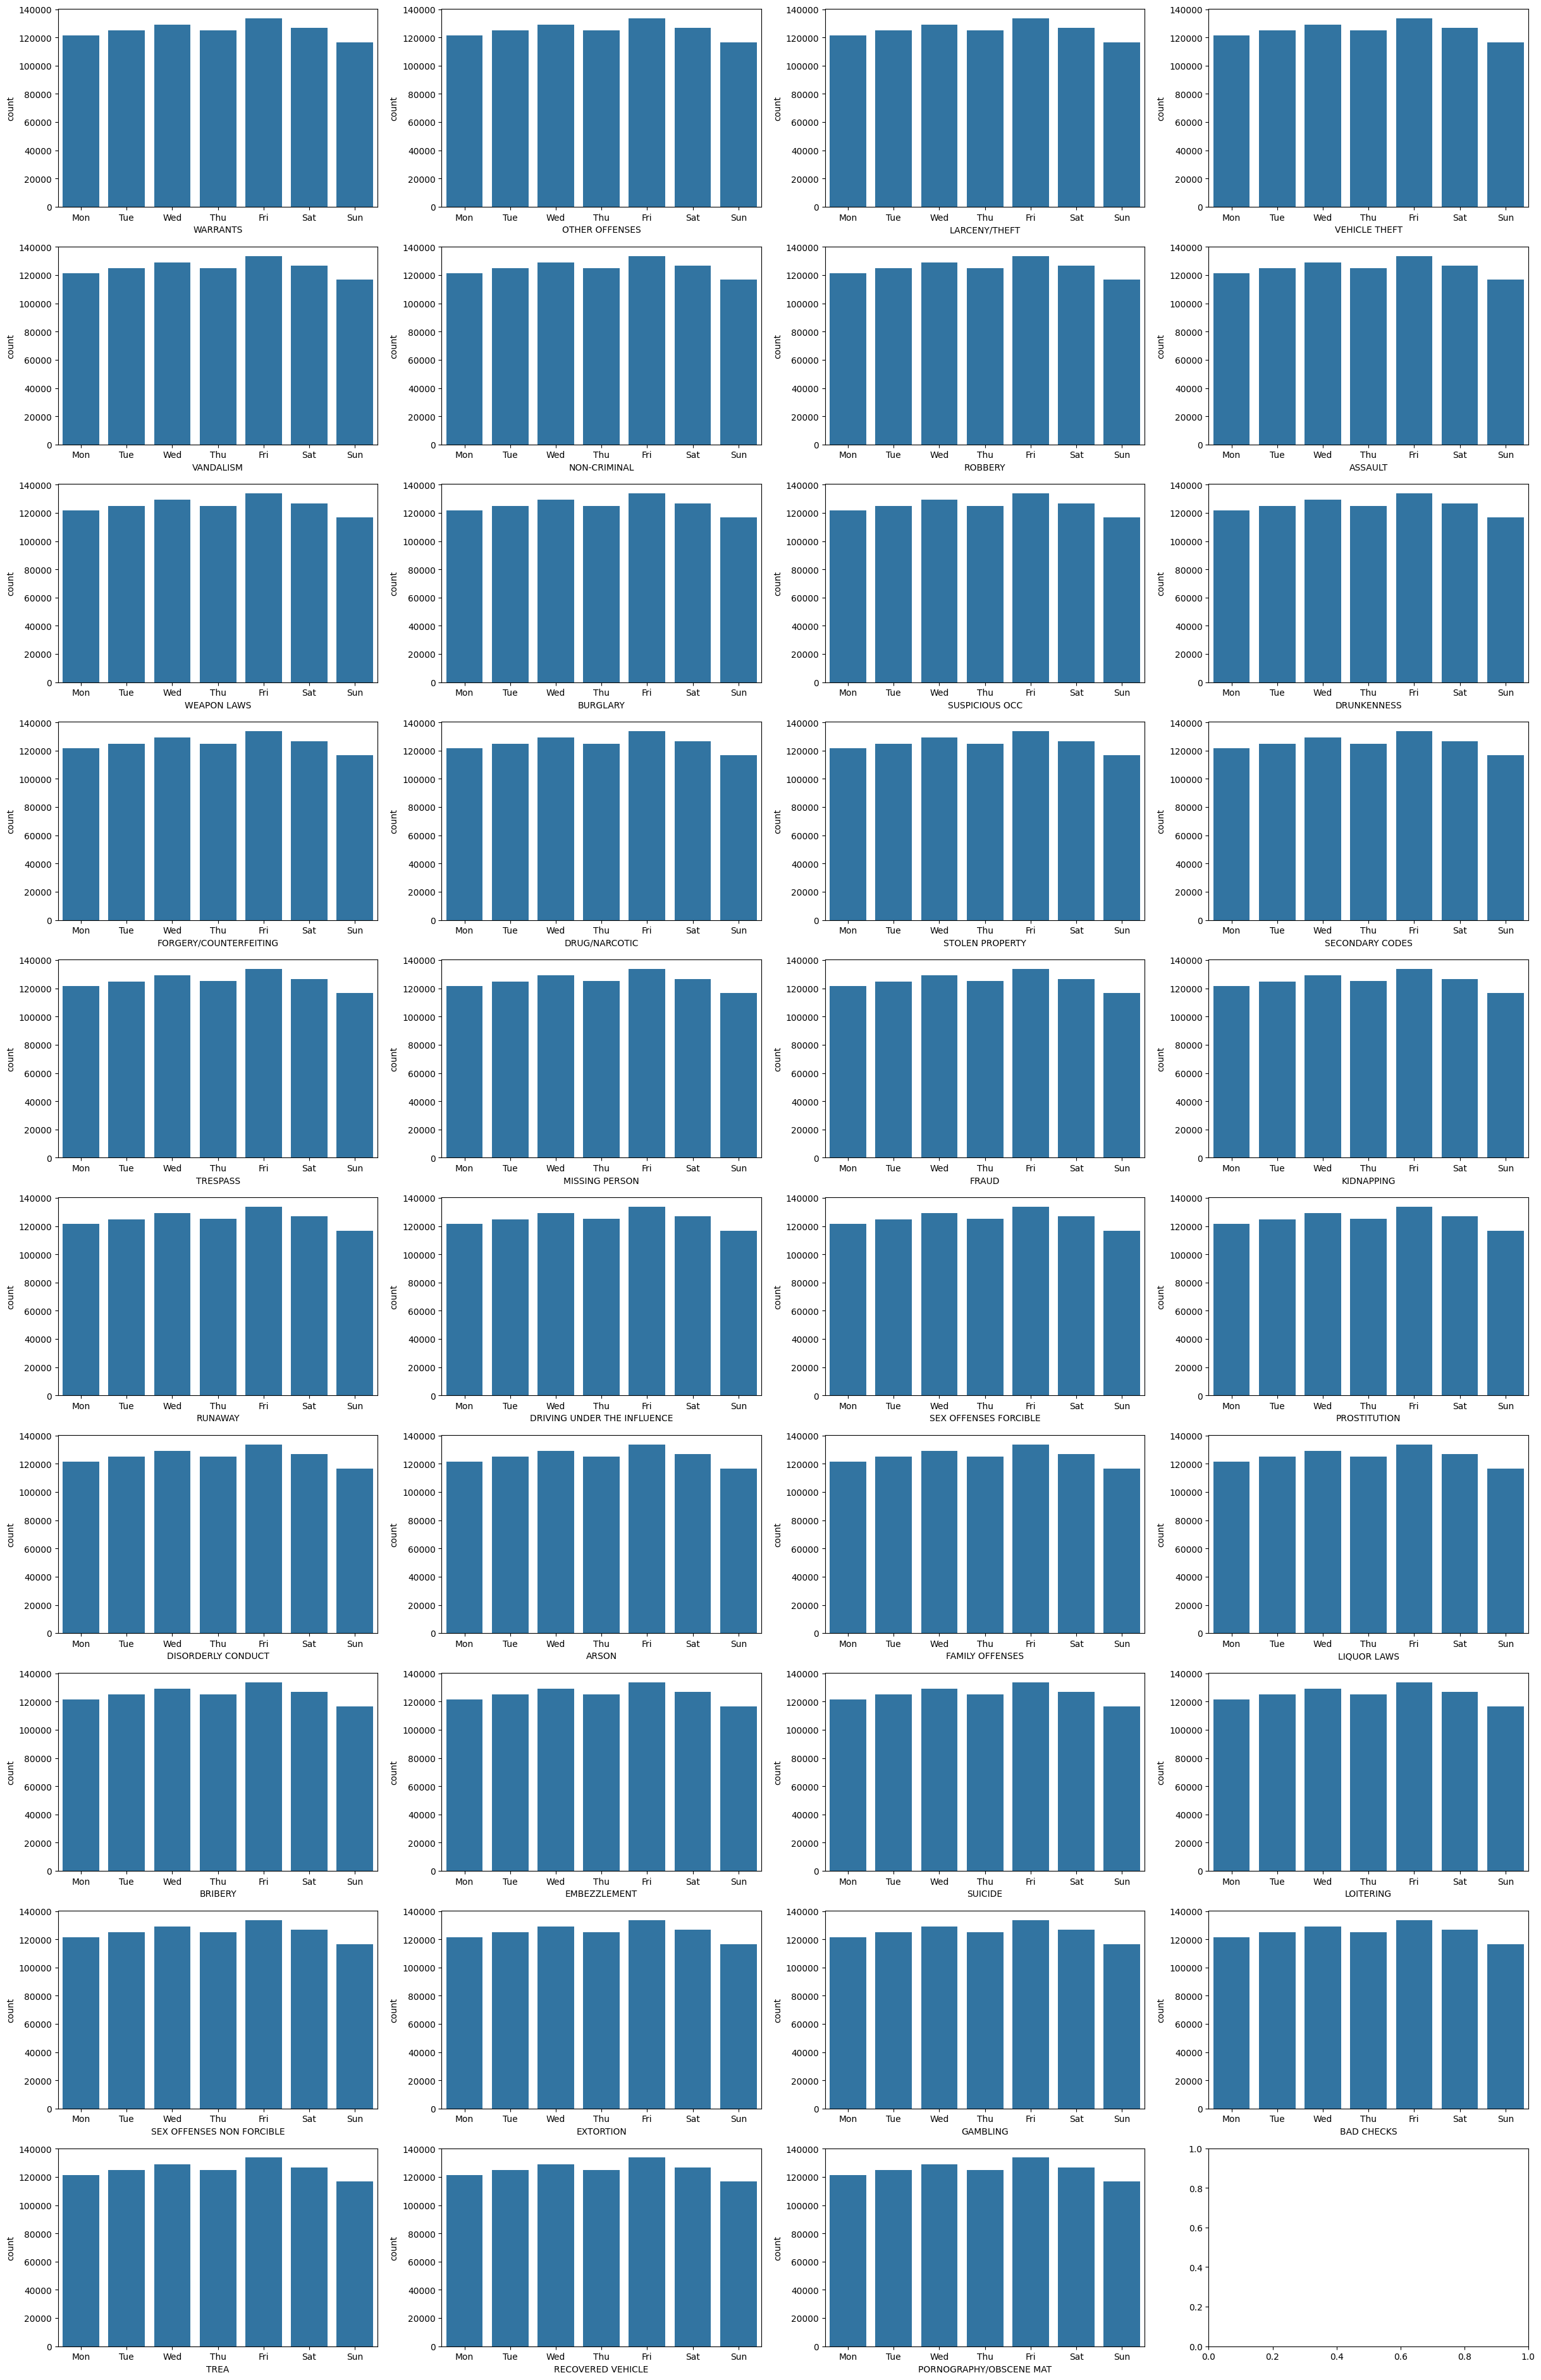

In [63]:
figure, axes = plt.subplots(nrows=10, ncols=4)

figure.set_size_inches(30,48)

category_list = non_outliers['Category'].unique()

for row in range(10):
    for col in range(4):
        index = row*4 + col
        if index < len(category_list):
            ax = axes[row][col]
            category = category_list[index]
            pic = sns.countplot(ax=ax, data=non_outliers[non_outliers['Category']==category], x=non_outliers['dayofweek'])
            pic.set_xticklabels(eng_dow)
            pic.set_xlabel(category)

In [65]:
non_outliers['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

<Axes: xlabel='count', ylabel='PdDistrict'>

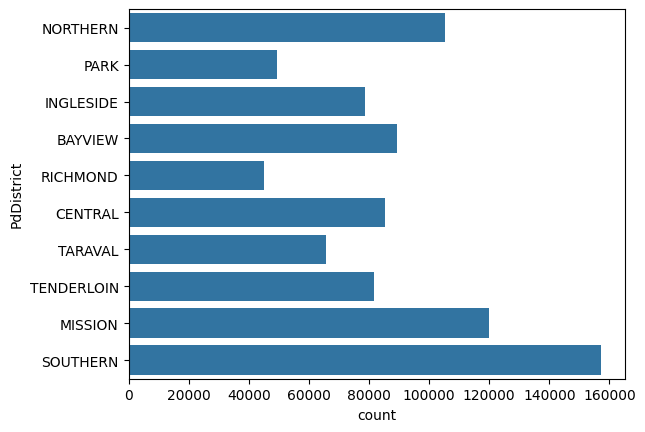

In [70]:
sns.countplot(data=non_outliers,y='PdDistrict')

In [74]:
# 구획별 범죄
dst_crime = non_outliers.groupby(['PdDistrict','Category'])['Category'].count().unstack(fill_value=0)

In [75]:
dst_crime

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,393,9855,34,56,3929,219,179,4498,243,100,...,22,397,37,3905,3,636,5355,7219,4322,1647
CENTRAL,111,6977,65,12,4519,494,160,1805,517,180,...,7,510,60,2841,1,904,4469,4210,2777,487
INGLESIDE,182,8532,32,53,3331,171,206,2373,190,78,...,22,347,65,3167,0,416,5374,8960,2528,1130
MISSION,145,11149,46,66,3745,1099,357,8757,782,124,...,35,631,72,3808,1,1021,5294,7148,6615,1329
NORTHERN,149,8318,54,18,5854,450,260,4511,368,131,...,9,699,67,3270,1,780,5404,6291,4595,789
PARK,65,3515,15,7,2888,271,176,2573,374,50,...,6,175,20,1656,0,290,2613,3961,2318,357
RICHMOND,103,3202,31,8,2696,108,319,999,149,43,...,10,206,42,2191,0,245,3180,4113,1010,327
SOUTHERN,185,12183,74,37,4841,511,306,9228,959,275,...,17,1007,59,5065,0,1456,6550,4724,9101,1128
TARAVAL,120,5463,36,17,3463,162,202,1531,259,94,...,15,231,59,2996,0,386,4869,6142,1616,567


In [84]:
top5 = pd.DataFrame(dst_crime.iloc[0].sort_values(ascending = False)[:5])
top5

,BAYVIEW
Category,
OTHER OFFENSES,17051
LARCENY/THEFT,10118
ASSAULT,9855
VEHICLE THEFT,7219
NON-CRIMINAL,6099


In [82]:
dst_crime.index

Index(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
      dtype='object', name='PdDistrict')

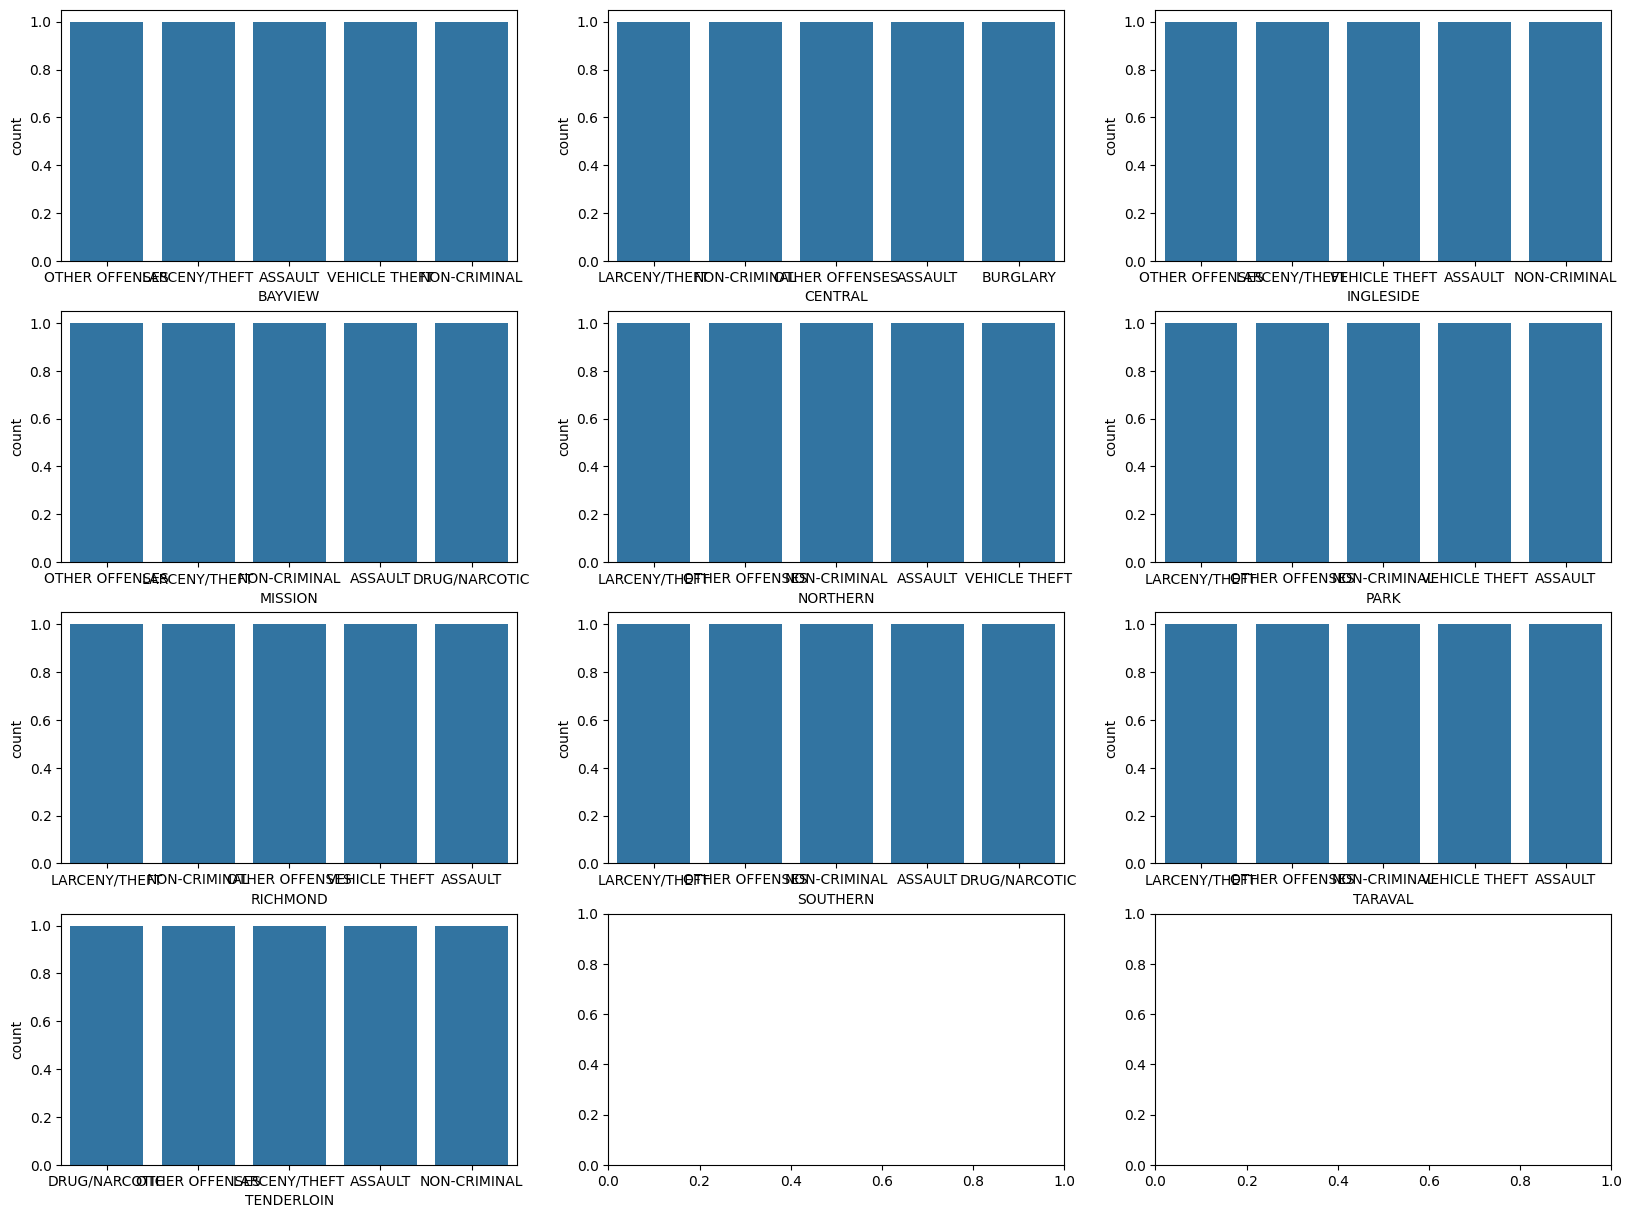

In [91]:
figure, axes = plt.subplots(nrows=4, ncols=3)

figure.set_size_inches(20,15)

pdDistrict_list = dst_crime.index

for row in range(4):
    for col in range(3):
        index = row*3 + col
        if index < len(pdDistrict_list):
            ax = axes[row][col]
            category = pdDistrict_list[index]
            top5 = pd.DataFrame(dst_crime.iloc[index].sort_values(ascending = False)[:5])
            pic = sns.countplot(ax=ax, data=top5, x='Category')
            pic.set_xlabel(category)